In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [3]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
X_train_norm

array([[9.85889457e-04, 6.55537103e-05, 1.77252585e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.83443219e-03, 4.37024736e-05, 4.43131462e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.46472364e-04, 6.55537103e-05, 4.43131462e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.51223119e-03, 8.74049471e-05, 1.32939439e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.31326638e-03, 3.49619788e-04, 2.21565731e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [4]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [5]:
# transform testing data
X_test_norm = norm.transform(X_test)
X_test_norm

array([[8.62653275e-04, 3.93322262e-04, 1.47710487e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.46472364e-04, 1.96661131e-04, 7.38552437e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.10970464e-03],
       [2.46472364e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.16180911e-04, 4.58875972e-04, 2.36336780e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.55277590e-02, 8.74049471e-05, 5.90841950e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.16180911e-03, 8.74049471e-05, 5.90841950e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
kn_clf = KNeighborsClassifier(n_neighbors=15)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('dt', dt_clf), ('kn', kn_clf)],
    voting='hard')
voting_clf.fit(X_train_norm, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8)),
                             ('kn', KNeighborsClassifier(n_neighbors=15))])

In [7]:
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, dt_clf, kn_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9762857142857143
DecisionTreeClassifier 0.9777142857142858
KNeighborsClassifier 0.9448571428571428
VotingClassifier 0.9865714285714285


In [8]:
from sklearn.metrics import confusion_matrix
y_pred = voting_clf.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[477   9   0   1   0   1   0]
 [ 14 479   0   0   0   0   0]
 [  0   0 514   0   0   5   0]
 [  1   0   0 490   0   1   0]
 [  1   0   1   0 490   0   0]
 [  0   0   8   0   0 504   1]
 [  0   0   1   0   0   3 499]]


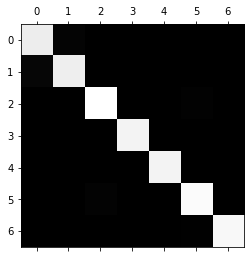

In [9]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

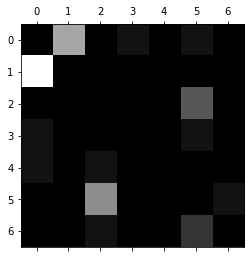

In [10]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# rows represent actual classes
# columns represent predicted classes
plt.show()